# Load Sentinel-2 data from the CDSE STAC catalog

This notebook shows an example how to load Sentinel-2 data from the [CDSE STAC API](https://browser.stac.dataspace.copernicus.eu/?.language=en).

### Setup
In order to run this notebook you may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac), following the [README](../../README.md).

The data can be accessed via S3, where key and secret can be obtained following the [CDSE access documentation to EO data via S3](https://documentation.dataspace.copernicus.eu/APIs/S3.html#generate-secrets). The store object will receive the key and secret upon initialization, as demonstrated below.

Now, we first import everything we need:

In [1]:
%%time
import itertools

import matplotlib.pyplot as plt
from xcube.core.store import new_data_store, get_data_store_params_schema

from xcube_stac.utils import reproject_bbox

CPU times: user 4.07 s, sys: 343 ms, total: 4.41 s
Wall time: 2.72 s


Next store the credentials in a dictionary. 

In [2]:
credentials = {
    "key": "xxx",
    "secret": "xxx",
}

First, we get the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). Note that key and secret of the S3 access are required.

In [3]:
%%time
store_params = get_data_store_params_schema("stac-cdse")
store_params

CPU times: user 26.5 ms, sys: 11.9 ms, total: 38.4 ms
Wall time: 38.2 ms


Note that the user does not need to provide the URL for the [CDSE STAC API](https://documentation.dataspace.copernicus.eu/APIs/STAC.html). Only the key and secret for S3 access are required when initializing a `stac-cdse` [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). First, we will initialize a store supporting the stacking mode. Then, for completeness, we will initialize a store in single-tile mode.

In [4]:
%%time
store = new_data_store("stac-cdse", stack_mode=True, **credentials)

CPU times: user 10.8 ms, sys: 1.08 ms, total: 11.9 ms
Wall time: 108 ms


The data IDs point to a STAC collections. So far only `'sentinel-2-l2a'` is supported.

In [5]:
%%time
data_ids = store.list_data_ids()
data_ids

CPU times: user 64.7 ms, sys: 8.97 ms, total: 73.6 ms
Wall time: 353 ms


['sentinel-3-olci-2-wfr-nrt',
 'sentinel-1-mosaic',
 'sentinel-3-sl-2-aod-nrt',
 'sentinel-1-grd',
 'sentinel-2-l2a',
 'sentinel-2-l1c',
 'sentinel-2-global-mosaics',
 'sentinel-3-sl-2-wst-nrt',
 'sentinel-3-olci-1-efr-nrt',
 'sentinel-3-olci-2-wrr-nrt',
 'sentinel-3-sl-2-lst-ntc',
 'sentinel-3-olci-1-efr-ntc',
 'sentinel-3-olci-2-wfr-ntc',
 'sentinel-3-olci-2-lfr-nrt',
 'sentinel-3-sl-2-wst-ntc',
 'sentinel-3-olci-1-err-nrt',
 'sentinel-3-olci-2-lfr-ntc',
 'sentinel-3-sl-2-frp-ntc',
 'sentinel-3-olci-1-err-ntc',
 'sentinel-3-sl-1-rbt-ntc',
 'sentinel-3-olci-2-lrr-ntc',
 'sentinel-3-sl-2-lst-nrt',
 'sentinel-3-sl-1-rbt-nrt',
 'sentinel-3-olci-2-lrr-nrt',
 'sentinel-3-sl-2-frp-nrt',
 'sentinel-5p-l1-ra-bd2-offl',
 'sentinel-3-sr-1-sra-a-nrt',
 'sentinel-5p-l1-ra-bd2-nrti',
 'sentinel-3-sr-1-sra-a-stc',
 'sentinel-5p-l1-ra-bd1-rpro',
 'sentinel-3-sr-1-sra-a-ntc',
 'sentinel-3-sr-1-sra-bs-ntc',
 'sentinel-5p-l1-ra-bd5-nrti',
 'sentinel-3-sr-1-sra-bs-stc',
 'sentinel-5p-l1-ra-bd6-offl',
 '

Below, the parameters for the `open_data` method can be viewed.

In [6]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 35 µs, sys: 4 µs, total: 39 µs
Wall time: 41.2 µs


So far, only data from the collection `sentinel-2-l2a` can be accessed. We therefore assign `data_id` to `"sentinel-2-l2a"`. We set the bounding box to cover the greater Hamburg area and the time range to second half of July 2020.

In [7]:
%%time
ds = store.open_data(
    data_id="sentinel-2-l2a",
    bbox=[9.1, 53.1, 10.7, 54],
    time_range=["2020-07-15", "2020-08-01"],
    spatial_res=10 / 111320, # meter in degree
    crs="EPSG:4326",
    asset_names=["B02", "B03", "B04", "SCL"],
    apply_scaling=True,
    angles_sentinel2=True,
)
ds

CPU times: user 59.9 s, sys: 1.16 s, total: 1min 1s
Wall time: 1min 52s


<xarray.Dataset> Size: 90GB
Dimensions:        (time: 11, lon: 17812, lat: 10019, angle: 2, band: 3)
Coordinates:
  * time           (time) datetime64[ns] 88B 2020-07-15T10:15:59.024000 ... 2...
    spatial_ref    int64 8B 0
  * lon            (lon) float64 142kB 9.1 9.1 9.1 9.1 ... 10.7 10.7 10.7 10.7
  * lat            (lat) float64 80kB 54.0 54.0 54.0 54.0 ... 53.1 53.1 53.1
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * band           (band) <U3 36B 'B02' 'B03' 'B04'
Data variables:
    B02            (time, lat, lon) float32 8GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B03            (time, lat, lon) float32 8GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B04            (time, lat, lon) float32 8GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    SCL            (time, lat, lon) uint16 4GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    solar_angle    (angle, time, lat, lon) float32 16GB dask.array<chunksize=(1, 1, 2048, 2048), meta=np.ndarray>
    viewing_angle  (angle, band, time, lat, lon) float32 47GB dask.array<chunksize=(1, 1, 1, 2048, 2048), meta=np.ndarray>
Attributes:
    stac_item_ids:     {'2020-07-15T10:15:59.024000': ['S2B_MSIL2A_20200715T1...
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1

We can plot the B04 (red) band for a given timestamp as an example. Hereby a mosaicking of multiple tiles have been applied. Additionally, we plot the solar and viewing angle.


CPU times: user 5min 16s, sys: 21.1 s, total: 5min 37s
Wall time: 5min


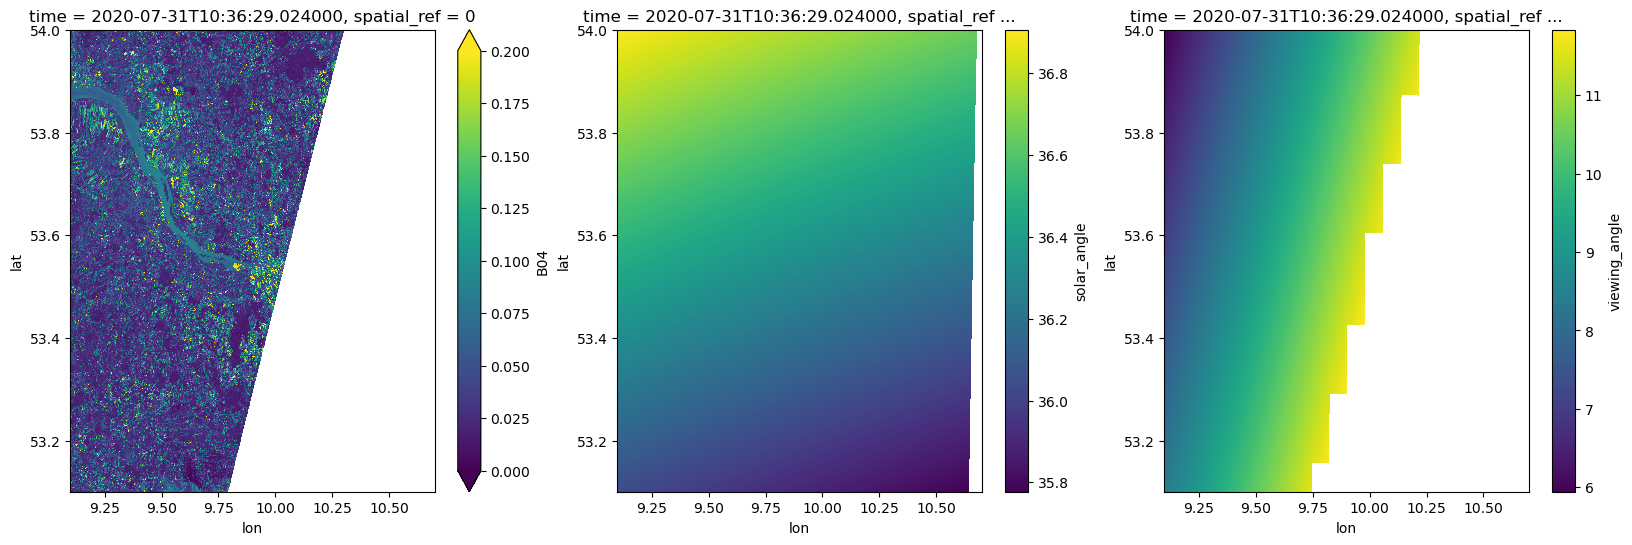

In [8]:
%%time
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ds.B04.isel(time=-1)[::10, ::10].plot(ax=ax[0], vmin=0, vmax=0.2)
ds.solar_angle.isel(angle=0, time=-1)[::10, ::10].plot(ax=ax[1])
ds.viewing_angle.isel(band=2, angle=0, time=-1)[::10, ::10].plot(ax=ax[2])

The data access can be speed up when requesting the data in the UTM CRS which is the native UTM of the Sentinel-2 products. 

In [9]:
%%time
bbox = [9.1, 53.1, 10.7, 54]
crs_target = "EPSG:32632"
bbox_utm = reproject_bbox(bbox, "EPSG:4326", crs_target)

CPU times: user 955 µs, sys: 0 ns, total: 955 µs
Wall time: 603 µs


In [10]:
%%time
ds = store.open_data(
    data_id="sentinel-2-l2a",
    bbox=bbox_utm,
    time_range=["2020-07-15", "2020-08-01"],
    spatial_res=10,
    crs=crs_target,
    asset_names=["B02", "B03", "B04", "SCL"],
    apply_scaling=True,
    angles_sentinel2=True,
)
ds

CPU times: user 12.5 s, sys: 1.2 s, total: 13.7 s
Wall time: 1min 8s


<xarray.Dataset> Size: 55GB
Dimensions:        (time: 11, y: 10147, x: 10727, angle: 2, band: 3)
Coordinates:
  * time           (time) datetime64[ns] 88B 2020-07-15T10:15:59.024000 ... 2...
    spatial_ref    int64 8B 0
  * x              (x) float64 86kB 5.066e+05 5.066e+05 ... 6.138e+05 6.138e+05
  * y              (y) float64 81kB 5.985e+06 5.985e+06 ... 5.883e+06 5.883e+06
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * band           (band) <U3 36B 'B02' 'B03' 'B04'
Data variables:
    B02            (time, y, x) float32 5GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B03            (time, y, x) float32 5GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B04            (time, y, x) float32 5GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    SCL            (time, y, x) uint16 2GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    solar_angle    (angle, time, y, x) float32 10GB dask.array<chunksize=(1, 1, 2048, 2048), meta=np.ndarray>
    viewing_angle  (angle, band, time, y, x) float32 29GB dask.array<chunksize=(1, 1, 1, 2048, 2048), meta=np.ndarray>
Attributes:
    stac_item_ids:     {'2020-07-15T10:15:59.024000': ['S2B_MSIL2A_20200715T1...
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1

Note that the search function in the CDSE STAC API is very slow. Further investigation and comparison with other STAC APIs is needed. 

We can plot the B04 (red) band for a given timestamp as an example. Hereby a mosaicking of multiple tiles have been applied. Additionally, we plot the solar and viewing angle.

CPU times: user 2min 21s, sys: 14.1 s, total: 2min 35s
Wall time: 2min 9s


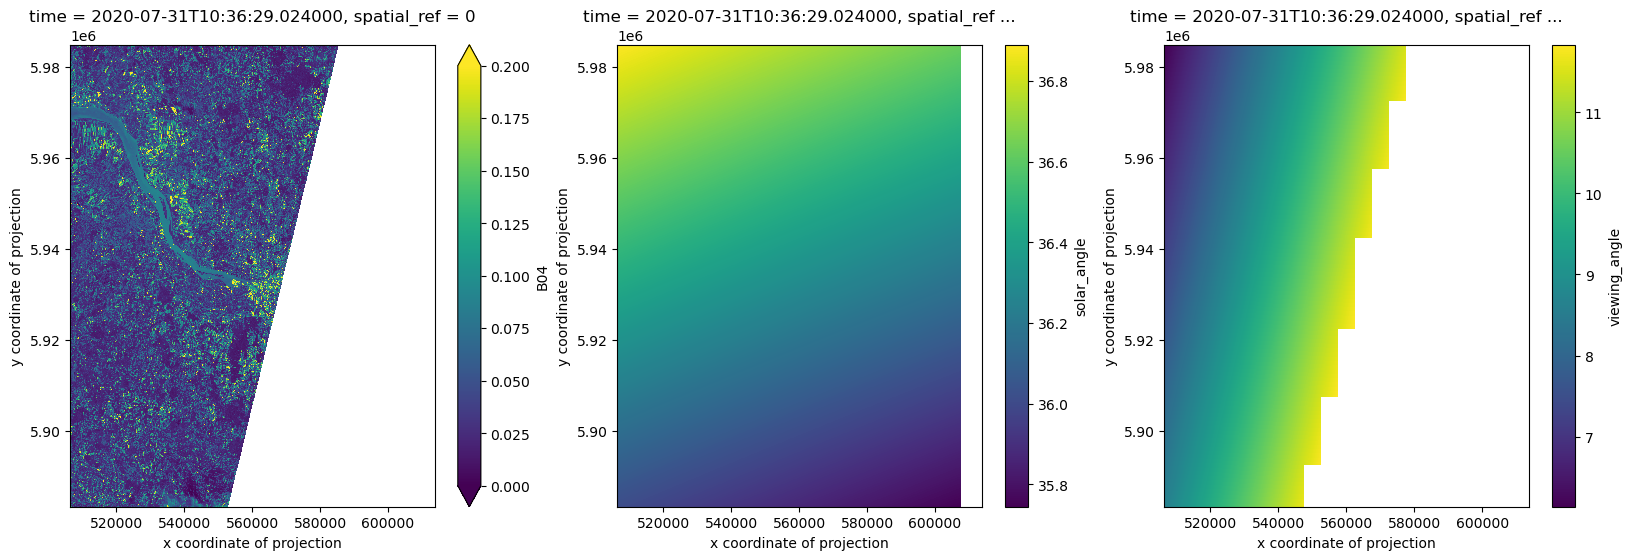

In [11]:
%%time
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ds.B04.isel(time=-1)[::10, ::10].plot(ax=ax[0], vmin=0, vmax=0.2)
ds.solar_angle.isel(angle=0, time=-1)[::10, ::10].plot(ax=ax[1])
ds.viewing_angle.isel(band=2, angle=0, time=-1)[::10, ::10].plot(ax=ax[2])

----
## Data store in the single-tile mode
For completeness, we initiate the data store in the single-tile mode and open data of one tile. 

In [12]:
%%time
store = new_data_store("stac-cdse", stack_mode=False, **credentials)

CPU times: user 7.41 ms, sys: 2.82 ms, total: 10.2 ms
Wall time: 110 ms


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be streamed using the following code where we show the first 10 data IDs as an example.

⚠️ Warning: If you use `store.list_data_ids()` it will try to collect all Sentinel-2 tiles in the archive, before printing the result. This can take a while, and is not recommended. 

In [13]:
%%time
data_ids = store.get_data_ids()
list(itertools.islice(data_ids, 10))

CPU times: user 16.1 ms, sys: 0 ns, total: 16.1 ms
Wall time: 853 ms


['collections/sentinel-5p-l2-so2-nrti/items/S5P_NRTI_L2__SO2____20250519T113202_20250519T113702_39371_03_020701_20250519T121242',
 'collections/sentinel-5p-l2-o3-nrti/items/S5P_NRTI_L2__O3_____20250519T113202_20250519T113702_39371_03_020701_20250519T121147',
 'collections/sentinel-5p-l2-no2-nrti/items/S5P_NRTI_L2__NO2____20250519T113202_20250519T113702_39371_03_020800_20250519T121152',
 'collections/sentinel-5p-l2-hcho-nrti/items/S5P_NRTI_L2__HCHO___20250519T113202_20250519T113702_39371_03_020701_20250519T121149',
 'collections/sentinel-5p-l2-co-nrti/items/S5P_NRTI_L2__CO_____20250519T113202_20250519T113702_39371_03_020800_20250519T120630',
 'collections/sentinel-5p-l2-cloud-nrti/items/S5P_NRTI_L2__CLOUD__20250519T113202_20250519T113702_39371_03_020701_20250519T120632',
 'collections/sentinel-5p-l2-aer-ai-nrti/items/S5P_NRTI_L2__AER_AI_20250519T113202_20250519T113702_39371_03_020800_20250519T120635',
 'collections/sentinel-5p-l1-ra-bd8-nrti/items/S5P_NRTI_L1B_RA_BD8_20250519T113156_202

In the next step, we can search for items using search parameters. The following code shows which search parameters are available.

In [14]:
%%time
search_params = store.get_search_params_schema()
search_params

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 33.1 µs


 Next, we will search for tiles of Sentinel-2 data.

In [15]:
%%time
descriptors = list(
    store.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[9, 47, 10, 48],
        time_range=["2020-07-01", "2020-07-05"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 213 ms, sys: 5.05 ms, total: 218 ms
Wall time: 2.72 s


[{'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32UNU_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.999728, 47.755819, 10.493269, 48.753013],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32UMU_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.087776, 47.759622, 9.132783, 48.752937],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TNT_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.999733, 46.85664, 10.467277, 47.853702],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T175912',
  'data_type': 'dataset',
  'bbox': [7.760786, 46.858555, 9.13047, 47.853628],
  'time_range':

In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [16]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 28 µs, sys: 2 µs, total: 30 µs
Wall time: 32.2 µs


We select the band B04 (red), B03 (green), B02 (blue), and the science classification layer (SLC), and lazily load the corresponding data.

In [17]:
%%time
ds = store.open_data(
    "collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T175912",
    asset_names=["B04", "B03", "B02", "SCL"],
    apply_scaling=True,
    angles_sentinel2=True,
)
ds

CPU times: user 275 ms, sys: 12.7 ms, total: 287 ms
Wall time: 1.71 s


<xarray.Dataset> Size: 5GB
Dimensions:        (y: 10980, x: 10980, angle: 2, band: 3)
Coordinates:
    spatial_ref    int64 8B 0
  * x              (x) float64 88kB 4e+05 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y              (y) float64 88kB 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * band           (band) <U3 36B 'B02' 'B03' 'B04'
Data variables:
    B04            (y, x) float32 482MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    B03            (y, x) float32 482MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    B02            (y, x) float32 482MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    SCL            (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    solar_angle    (angle, y, x) float32 964MB dask.array<chunksize=(1, 10980, 10980), meta=np.ndarray>
    viewing_angle  (angle, band, y, x) float32 3GB dask.array<chunksize=(1, 1, 10980, 10980), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1
    stac_item_id:      S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T...

We plot the loaded data as an example below.

CPU times: user 19 s, sys: 1.05 s, total: 20 s
Wall time: 11.5 s


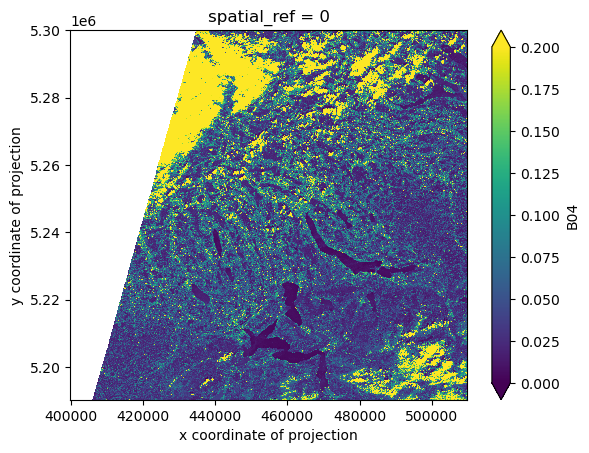

In [18]:
%%time
ds.B04[::10, ::10].plot(vmin=0.0, vmax=0.2)

We can also open a `.jp2` as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution, shown below.  

In [19]:
%%time
mlds = store.open_data(
    descriptors[3].data_id,
    data_type="mldataset",
    asset_names=["B04", "B03", "B02"],
    apply_scaling=True,
    angles_sentinel2=True,
)
mlds.num_levels

CPU times: user 25 ms, sys: 2 ms, total: 27 ms
Wall time: 391 ms


5

In [20]:
%%time
ds = mlds.get_dataset(2)
ds

CPU times: user 154 ms, sys: 14.1 ms, total: 168 ms
Wall time: 733 ms


<xarray.Dataset> Size: 332MB
Dimensions:        (x: 2745, y: 2745, angle: 2, band: 3)
Coordinates:
  * x              (x) float64 22kB 4e+05 4e+05 ... 5.097e+05 5.097e+05
  * y              (y) float64 22kB 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref    int64 8B 0
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * band           (band) <U3 36B 'B02' 'B03' 'B04'
Data variables:
    B04            (y, x) float32 30MB dask.array<chunksize=(2745, 2745), meta=np.ndarray>
    B03            (y, x) float32 30MB dask.array<chunksize=(2745, 2745), meta=np.ndarray>
    B02            (y, x) float32 30MB dask.array<chunksize=(2745, 2745), meta=np.ndarray>
    solar_angle    (angle, y, x) float32 60MB dask.array<chunksize=(1, 2745, 2745), meta=np.ndarray>
    viewing_angle  (angle, band, y, x) float32 181MB dask.array<chunksize=(1, 1, 2745, 2745), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1
    stac_item_id:      S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T...

CPU times: user 1.81 s, sys: 558 ms, total: 2.36 s
Wall time: 4.04 s


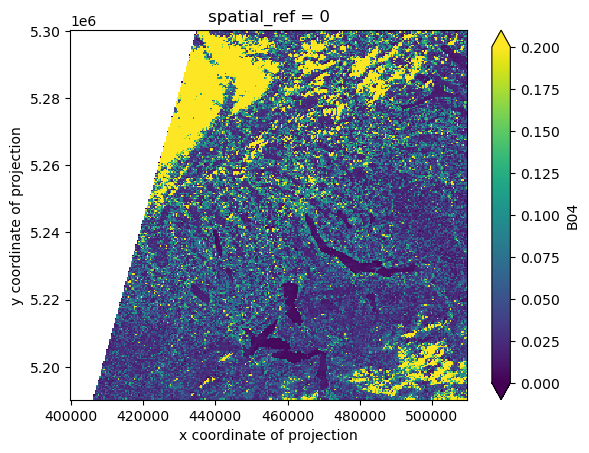

In [21]:
%%time
ds.B04[::10, ::10].plot(vmin=0.0, vmax=0.2)